## Machine-Learning Workflow

![image.png](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)


In [1]:
import torch
from torch import nn # nn contains neural network packages in PyTroch
import matplotlib.pyplot as plt
import seaborn as sns

torch.__version__

'2.5.1+cu118'

<b> Data (Preparing and Loading into) </b>
 
Data can be almost anything in ML...

Excel Sheets , Images , Videos , Audio , Text and many more...

ML is game of two parts : 
1. Get Data into numerical representation.
2. Building a model to learn patterns in numerical data.

Using *Linear Regression* formula to make a straight line on known data , with known **parameters** of the formula

In [2]:
# known parameters

weight = 0.8 # Bi from eq. y = B0 * sum(Bi*xi) [slope]
bias = 0.4 # B0 from eq. y = B0 * sum(Bi*xi) [y intercept]

X = torch.arange(0 , 1 , 0.03).unsqueeze(dim=1)
y = bias + (weight * X) # Simple Linear Regression formulation.

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200],
         [0.1500],
         [0.1800],
         [0.2100],
         [0.2400],
         [0.2700]]),
 tensor([[0.4000],
         [0.4240],
         [0.4480],
         [0.4720],
         [0.4960],
         [0.5200],
         [0.5440],
         [0.5680],
         [0.5920],
         [0.6160]]))

In [3]:
len(X) , len(y)

(34, 34)

<b> Making *Traning* and *Testing* splits of data for traning our model. </b>

In [4]:
train_split = int(0.8 * len(X))
train_split

27

In [5]:
test_split = int(0.2 * len(y))
test_split

6

In [6]:
X_train , y_train , X_test , y_test = X[:train_split] , y[:train_split] , X[train_split:] , y[train_split:]

<b>Visualizing Data</b>

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

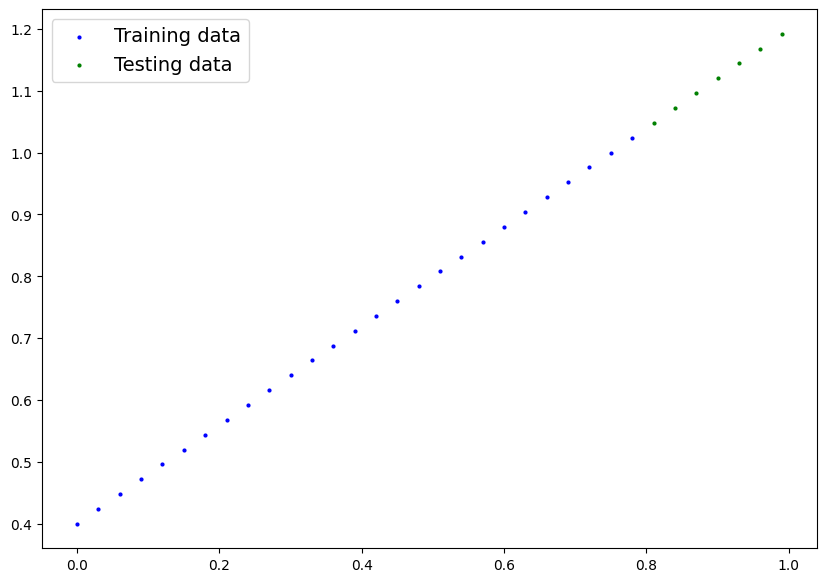

In [8]:
plot_predictions(X_train , y_train , X_test , y_test)

<b> PyTroch Model building essentials </b>

* torch.nn -> contains all of the building blocks for Neural Network.

* torch.nn.Module -> Base class for all neural network module. If inherited we should override forward().

* torch.nn.Parameter -> What parameters should our model try and learn, often a torch.nn layer will set it for us.

* forward() -> method in nn.Module class which defines computation of the model.

* torch.optim -> Pytorch's optimizer which will help with minimizing the cost function.


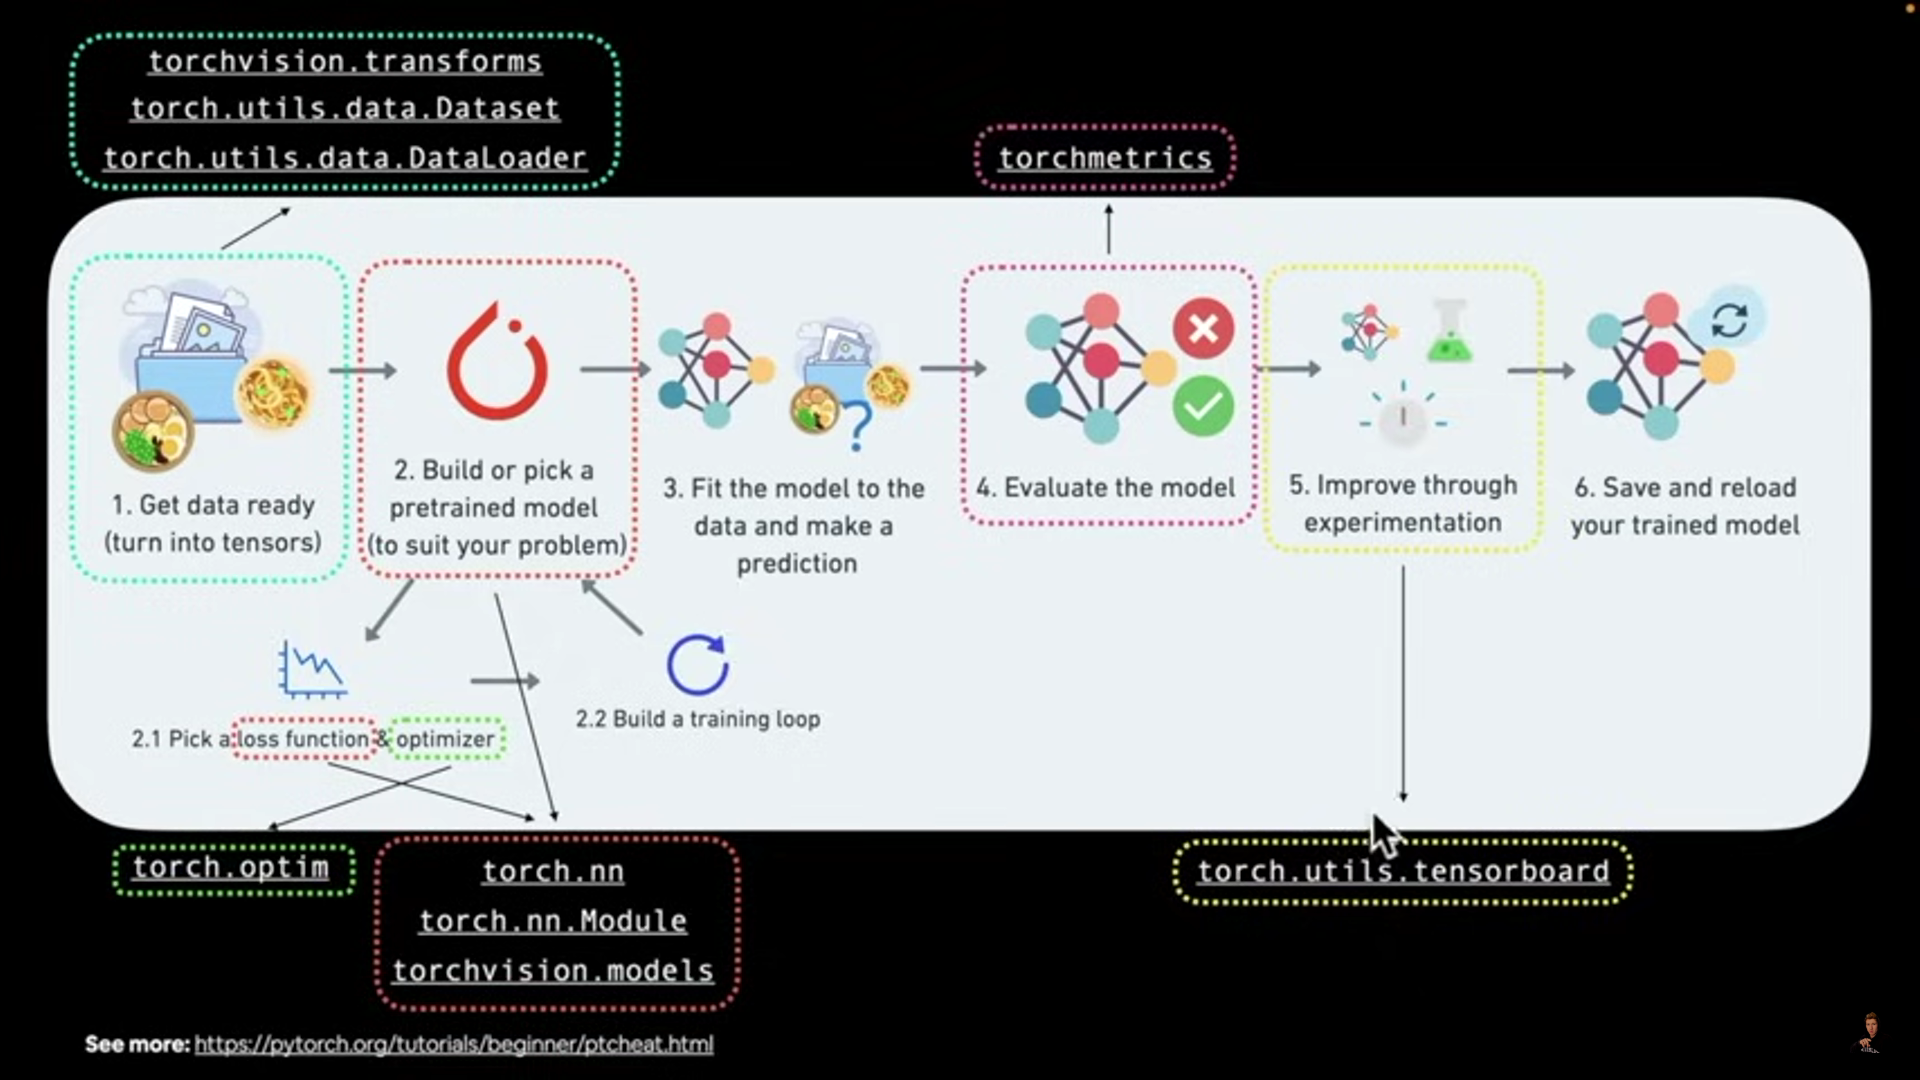


<b>Building a PyTorch Regression Model</b>

This model starts with random values (weights and bias ) , Looks at training data and adjust the random values to better represent (or getting closer to) our **known Values of Weights and Bias**

It does this through 2 main algorithms:
1. Gradient Descent.
2. Back Propogation.

Both Algorithms are already implemented in PyTorch

In [9]:
# Linear Regression Model Class

# nn.Parameter() : A kind of Tensor that is to be considered a module parameter. Parameters are ~torch.Tensor subclasses, that have a
# very special property when used with Module s - when they're assigned as Module attributes they are automatically added to the list of
# its parameters, and will appear e.g. in ~Module.parameters iterator.

class LinearRegression(nn.Module): # <- Almost everything builds up from nn.Module in PyTroch
    def __init__(self):
        super().__init__()

        # making a random tensor parameters ( for gradient descent 'requires_grad=True' is set)
        self.weights = nn.Parameter(torch.rand(1 , requires_grad=True , dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1 , requires_grad=True , dtype=torch.float)) 

        # When Computations run PyTorch keeps track of gradient of these parameters and updates 
        # them through combination of Gradient Descent and BackPropogation.


    """ forward method to define computation in the model """
    def forward(self , x:torch.Tensor) -> torch.Tensor:
        return self.bias + (self.weights * x) # Linear Regression Formulation
    
    

<b> Checking the contents of our Model </b>

In [10]:
torch.manual_seed(42) # because our model's weights and biases are randomly generated , for sake of demonstration of how ot view Model's content.

Model = LinearRegression()

# list(Model.parameters()) or dict(Model.parameters())

In [11]:
Model.weights

Parameter containing:
tensor([0.8823], requires_grad=True)

In [12]:
Model.bias

Parameter containing:
tensor([0.9150], requires_grad=True)

<b> Making predictions using `torch.inference_mode()` </b>

In [13]:
X_test

tensor([[0.8100],
        [0.8400],
        [0.8700],
        [0.9000],
        [0.9300],
        [0.9600],
        [0.9900]])

In [14]:
with torch.inference_mode(): # inference mode turn offs the gradient tracking of pytorch... Same can be done with `torch.no_grad()`
    y_preds = Model(X_test)

y_preds

tensor([[1.6296],
        [1.6561],
        [1.6826],
        [1.7090],
        [1.7355],
        [1.7620],
        [1.7885]])

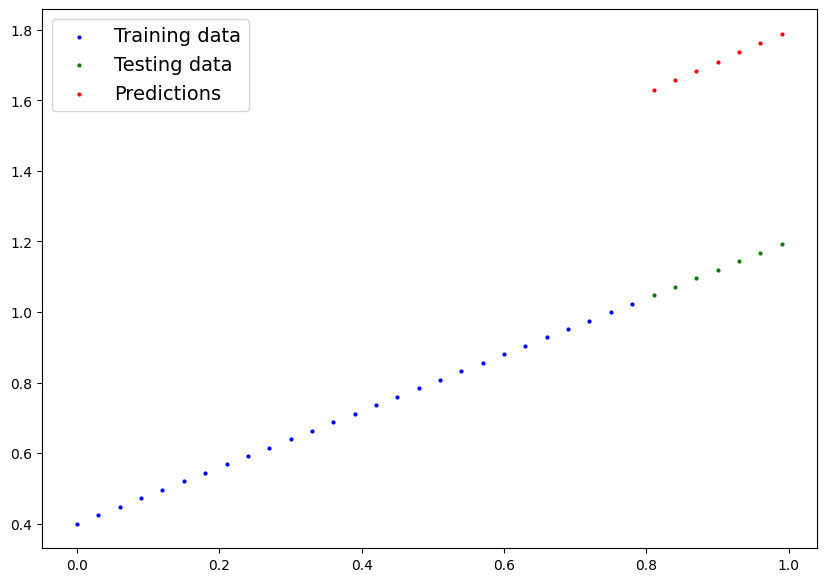

In [15]:
plot_predictions(X_train , y_train , X_test , y_test , y_preds)

<b> Traning Our Model </b>

Idea of traning for a model is to move from some *unkown* values of parameters to *known* / *better* parameters 

One way to measure how poor the model's predictions are , is to use a **Cost function** [also known as **Loss function** or **criterion**]. (actual value - predicted value for the label)

**Optimizer** is a layer on top of this cost function is what takes loss of the model in account and adjusts the parameters for improvement of cost function [aim is to reduce the cost function].

In [16]:
# Mean Absolute Error ( as a loss function )
MAE_Loss = torch.mean(torch.abs(y_test-y_preds))
MAE_Loss

tensor(0.5890)

In [17]:
# Optimizer
Optimizer = torch.optim.SGD(Model.parameters() , lr=0.01) # 'lr' stands for learning rate [here learning rate defines how rapidly
#                                                           optimization algorithm makes changes to model's parameters].

Optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [18]:
# Traning And Testing loop in PyTorch

# step 1 is to loop through the data.
# step 2 is to apply Forward Pass ( this involves data moving through model's `forward()` method to make predictions on data ) - Or Forward Propogation.
# step 3 is to calculate loss ( compare predictions to true labels ).
# step 4 is Optimizer zero_grad
# step 5 is to Loss Backward or BackPropogation. [ Calculate the gradients of model's parameters respect to loss ].
# step 6 is to use Optimizer for adjusting model's parameters. [ Gradient Descent ]


# An Epoch is a single loop through data.

# epochs = 1 # A hyperparameter we can adjust. Iterations of improvement.
epochs = 200

epoch_count = []
trainloss = []
testloss = []

for epoch in range(epochs):
    Model.train() # Setting model to Training Mode. ( there are 2 modes 'train' and 'eval' )

    # Forward pass
    y_pred = Model(X_train)

    # Calculating Loss
    loss_fn = nn.L1Loss()
    loss = loss_fn(y_pred , y_train)
    # print(f"Loss : {loss}")

    #Why is optimizer.zero_grad() needed? : 
    # When training a model with PyTorch, gradients are computed during the backward pass using loss.backward(). 
    # However, PyTorch accumulates gradients by default (i.e., it sums gradients at each step instead of overwriting them).

    # This behavior is useful in scenarios like gradient accumulation over multiple mini-batches, but in a standard training loop, 
    # you must reset the gradients at the start of each training step. If you don’t, the gradients from previous steps will interfere 
    # with the current gradients, leading to incorrect updates.
    Optimizer.zero_grad()

    # BackPropogating with respect to the loss
    loss.backward()

    # Gradient Descent
    Optimizer.step()

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        trainloss.append(loss)

        Model.eval() # turns off different settings that are not necessary for evaluation..
        with torch.inference_mode():
            # forward pass
            test_pred = Model(X_test)
            # Loss of test
            test_loss = loss_fn(test_pred , y_test)
            testloss.append(test_loss)

        print(f"Epochs : {epoch} || Loss : {loss} || Loss on Test data : {test_loss}")

Model.state_dict()


Epochs : 0 || Loss : 0.5470889806747437 || Loss on Test data : 0.5755362510681152
Epochs : 10 || Loss : 0.43187907338142395 || Loss on Test data : 0.4404364228248596
Epochs : 20 || Loss : 0.316669225692749 || Loss on Test data : 0.3053366541862488
Epochs : 30 || Loss : 0.2014593482017517 || Loss on Test data : 0.17023681104183197
Epochs : 40 || Loss : 0.0862494632601738 || Loss on Test data : 0.03513697162270546
Epochs : 50 || Loss : 0.019575953483581543 || Loss on Test data : 0.04212658852338791
Epochs : 60 || Loss : 0.015858514234423637 || Loss on Test data : 0.03709641471505165
Epochs : 70 || Loss : 0.012347804382443428 || Loss on Test data : 0.02798323892056942
Epochs : 80 || Loss : 0.00883951410651207 || Loss on Test data : 0.019890818744897842
Epochs : 90 || Loss : 0.005328487604856491 || Loss on Test data : 0.011798365041613579
Epochs : 100 || Loss : 0.0018072867533192039 || Loss on Test data : 0.0037059274036437273
Epochs : 110 || Loss : 0.006852176506072283 || Loss on Test dat

OrderedDict([('weights', tensor([0.7981])), ('bias', tensor([0.4076]))])

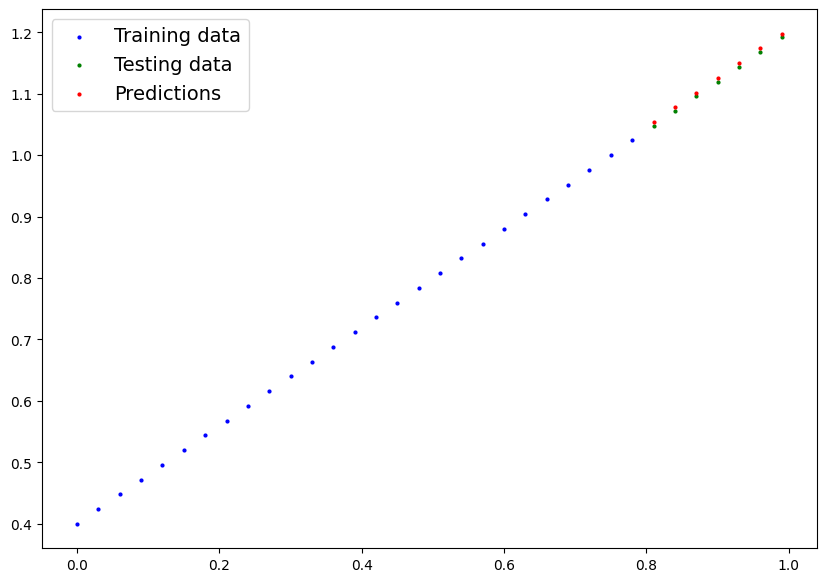

In [19]:
with torch.inference_mode():
     preds = Model(X_test)

plot_predictions(X_train , y_train , X_test , y_test , preds)

# Reductions after running several iterations of traning on model...

In [20]:
epoch_count , trainloss , testloss

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.5471, grad_fn=<MeanBackward0>),
  tensor(0.4319, grad_fn=<MeanBackward0>),
  tensor(0.3167, grad_fn=<MeanBackward0>),
  tensor(0.2015, grad_fn=<MeanBackward0>),
  tensor(0.0862, grad_fn=<MeanBackward0>),
  tensor(0.0196, grad_fn=<MeanBackward0>),
  tensor(0.0159, grad_fn=<MeanBackward0>),
  tensor(0.0123, grad_fn=<MeanBackward0>),
  tensor(0.0088, grad_fn=<MeanBackward0>),
  tensor(0.0053, grad_fn=<MeanBackward0>),
  tensor(0.0018, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>)],
 [tensor(

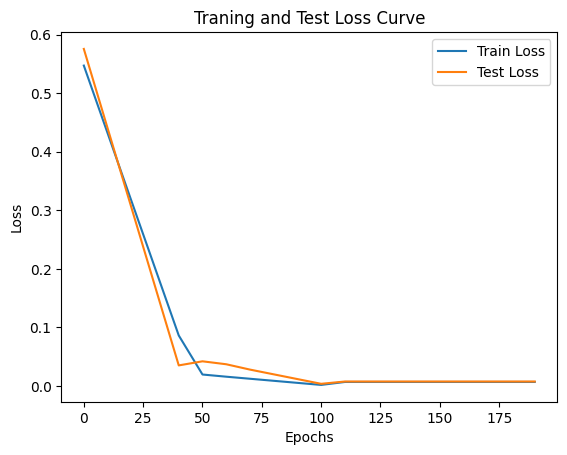

In [21]:
# Evaluation of model's performance on every step with the loss curve

import numpy as np

plt.plot(epoch_count , torch.tensor(trainloss).numpy() , label="Train Loss")
plt.plot(epoch_count , testloss , label="Test Loss")
plt.title("Traning and Test Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

<b> Saving a Model in PyTorch </b>

There are three methods in PyTorch to save our models : 
1. `torch.save()` which implements a module called `pickle` to serialize and de-serialize Python Objects.
2. `torch.load()` which loads a PyTorch object
3. `torch.nn.Module.load_save_dict()` which allows us to load model's save state.

In [ ]:
## Saving model locally...
from pathlib import Path

# Creating model path directory..
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# Creating a model save path
MODEL_NAME = "00_Linear_Regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the model state
torch.save(obj=Model.state_dict() , f=MODEL_SAVE_PATH)

In [31]:
# Saving the entire model...
torch.save(obj=Model , f=MODEL_SAVE_PATH)

In [33]:
eval_X = torch.rand(10)
eval_X

tensor([0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274, 0.2696,
        0.4414])

In [35]:
eval_y = bias + (eval_X * weight)
eval_y

tensor([1.0955, 0.8542, 0.9929, 0.7435, 1.1084, 0.8591, 0.6133, 0.9020, 0.6157,
        0.7531])

In [38]:
loaded_model = torch.load(f=MODEL_SAVE_PATH , weights_only=False)
loaded_model.eval()

LinearRegression()

In [40]:
testing_preds = loaded_model(eval_X)

testing_preds

tensor([1.1015, 0.8607, 0.9991, 0.7503, 1.1143, 0.8656, 0.6204, 0.9084, 0.6228,
        0.7598], grad_fn=<AddBackward0>)

C:\Users\mohit\AppData\Local\Temp\ipykernel_14424\3481818396.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.scatter(eval_X , torch.tensor(testing_preds).numpy() , c="r" , label="Predictions");


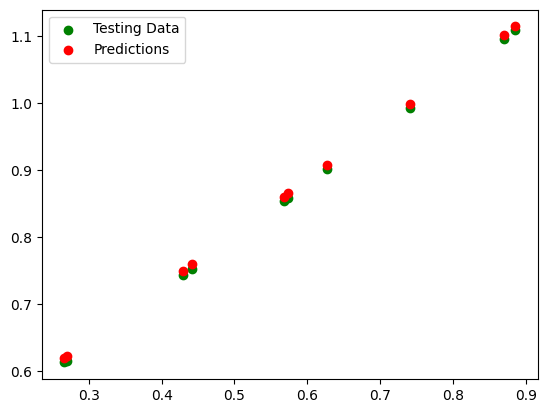

In [52]:
plt.scatter(eval_X , eval_y , c="g" , label="Testing Data");
plt.scatter(eval_X , torch.tensor(testing_preds).numpy() , c="r" , label="Predictions");
plt.legend();